###data manipulation and processing

#### importing neccesary libaries and dataset sample

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
print(dataset.data)

viewing the data features


In [5]:
print(dataset.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [4]:
print(dataset.feature_names)
print(dataset.DESCR)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for Califo

printing the dataset target variable



In [ ]:
print(dataset.target)

loading the data in data frame

In [6]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
#adding a table for target variable
df["MEDV"] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


data cleansing

In [8]:
#The next step would be to clean the data and perform any conversion if necessary.
#First, use the info() function to check the data type of each field
df.info( )
# for sckilearn you need encode the data in numerical values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


checking for the null values using isnull function

In [10]:
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64


In [11]:
#no null values for our data incase of null values you can use the code below.
# import pandas as pd

# Assuming df is your DataFrame
# Replace 'df' with the name of your DataFrame

# Drop rows with any null values
df.dropna(inplace=True)

# Or drop columns with any null values
df.dropna(axis=1, inplace=True)


###Feature selection
Now that the data is good to go, we are ready to move on to the next step of
the process. As there are 13 features in the dataset, we do not want to use all
of these features for training our model, because not all of them are relevant.
Instead, we want to choose those features that directly influence the result (that
is, prices of houses) to train the model. For this, we can use the corr() function.
The corr() function computes the pairwise correlation of columns

In [12]:
corr = df.corr( )
print(corr)
corr.to_csv('corr.csv')

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MEDV        0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude      MEDV  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

In [ ]:
# we can download this file for futher ananlysis
from google.colab import files
files.download('corr.csv')

###concept note
A positive correlation is a relationship between two variables in which both
variables move in tandem. A positive correlation exists when one variable
decreases as the other variable decreases, or one variable increases while the
other variable increases. Similarly, a negative correlation is a relationship between
two variables in which one variable increases as the other decreases. A perfect
negative correlation is represented by the value –1.00: a 0.00 indicates no corre-
lation and a +1.00 indicates a perfect positive correlation

In [15]:
# we can print out features with highest correlation
# get the top three features with the highest value of correlation
top_three_features = corr.nlargest(3, "MEDV")
print(top_three_features)


            MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MEDV      0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   
MedInc    1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
AveRooms  0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   

          Latitude  Longitude      MEDV  
MEDV     -0.144160  -0.045967  1.000000  
MedInc   -0.079809  -0.015176  0.688075  
AveRooms  0.106389  -0.027540  0.151948  


we can check the outliers of the data values

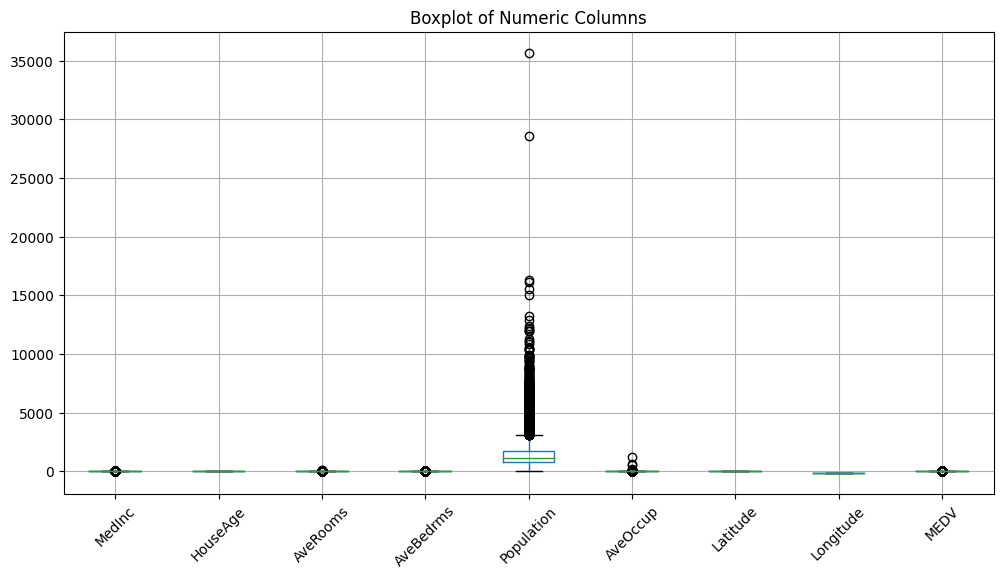

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace 'df' with the name of your DataFrame

# Select numeric columns from DataFrame
numeric_cols = df.select_dtypes(include='number')

# Create box plots for each numeric column to visualize outliers
plt.figure(figsize=(12, 6))
numeric_cols.boxplot()
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()


alternatively we can use z-score to get the outliers

In [17]:
from scipy import stats

# Calculate z-scores for each numeric column
z_scores = stats.zscore(numeric_cols)

# Define threshold for outlier detection (e.g., z-score > 3 or < -3)
threshold = 3

# Find outliers based on z-scores
outliers = numeric_cols[(z_scores > threshold).any(axis=1)]

print("Outliers detected:")
print(outliers)


Outliers detected:
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
131    11.6017      18.0  8.335052   1.082474       533.0  2.747423     37.84   
283     5.9849      22.0  6.528724   1.041179      4985.0  2.534316     37.79   
409    10.0825      52.0  8.209016   1.024590       658.0  2.696721     37.90   
510    11.8603      39.0  7.911111   0.984127       808.0  2.565079     37.82   
511    13.4990      42.0  8.928358   1.000000      1018.0  3.038806     37.82   
...        ...       ...       ...        ...         ...       ...       ...   
20529   2.9605      12.0  4.915341   1.022451      5633.0  2.634705     38.55   
20530   3.1371      11.0  5.070223   1.015530      7984.0  2.695476     38.57   
20544   2.0650      23.0  4.803493   1.013646      6330.0  3.455240     38.55   
20563   3.1250       9.0  5.148007   1.119593      6837.0  2.899491     38.67   
20629   2.0943      28.0  5.519802   1.020902      6912.0  3.801980     39.12   

       L

In [18]:
#removing the outliers
# Calculate the first quartile (Q1) and third quartile (Q3) of each numeric column
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
cleaned_df = df[~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)]

# Display the cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", cleaned_df.shape)


Original DataFrame shape: (20640, 9)
Cleaned DataFrame shape: (16312, 9)
